In [159]:
import pandas as pd
import numpy as np

Task 1:
Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv
Questions:
1. Delete unnamed columns
2. Show the distribution of male and female
3. Show the top 5 most preferred names
4. What is the median name occurence in the dataset
5. Distribution of male and female born count by states

In [118]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [119]:
#df[df['Count'] == df['Count'].max()]
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [120]:
#1. Delete unnamed columns
df.drop(['Unnamed: 0'],axis =1,inplace = True)

In [121]:
#2. Show the distribution of male and female
df['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [122]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [138]:
#3. Show the top 5 most preferred names
t = df[['Name','Count']].groupby(by='Name').sum()
t.sort_values(by='Count',ascending=False).head(5)

,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


In [124]:
#4. What is the median name occurence in the dataset
print(t[t['Count'] == t['Count'].median()].index.values)
print("Occurences of median name",t[t['Count'] == t['Count'].median()].index.values.shape[0])

['Aishani' 'Alara' 'Alysse' 'Ameir' 'Anely' 'Antonina' 'Aveline' 'Aziah'
 'Baily' 'Caleah' 'Carlota' 'Cristine' 'Dahlila' 'Darvin' 'Deante'
 'Deserae' 'Devean' 'Elizah' 'Emmaly' 'Emmanuela' 'Envy' 'Esli' 'Fay'
 'Gurshaan' 'Hareem' 'Iven' 'Jaice' 'Jaiyana' 'Jamiracle' 'Jelissa'
 'Jeovany' 'Jkwon' 'Kaedence' 'Kaelee' 'Kailana' 'Kaio' 'Kyndle' 'Kynsley'
 'Leylanie' 'Maisha' 'Malillany' 'Mariann' 'Marquell' 'Maurilio'
 'Mckynzie' 'Mehdi' 'Nabeel' 'Nalleli' 'Nassir' 'Nazier' 'Nishant'
 'Rebecka' 'Reghan' 'Ridwan' 'Riot' 'Rubin' 'Ryatt' 'Sameera' 'Sanjuanita'
 'Shalyn' 'Skylie' 'Sriram' 'Trinton' 'Vita' 'Yoni' 'Zuleima']
Occurences of median name 66


In [151]:
#5. Distribution of male and female born count by states
t = df.groupby('State')['Gender'].value_counts()
print(t)

State  Gender
AK     M          2587
       F          2404
AL     F          9878
       M          8419
AR     F          7171
       M          6475
AZ     F         14518
       M         10820
CA     F         45144
       M         31637
CO     F         11424
       M          9183
CT     F          6575
       M          5733
DC     F          3053
       M          3000
DE     F          2549
       M          2440
FL     F         25781
       M         20070
GA     F         19385
       M         15454
HI     M          3546
       F          3255
IA     F          7131
       M          6307
ID     F          4918
       M          4833
IL     F         21268
       M         16828
                 ...  
OK     F          9519
       M          8138
OR     F          8604
       M          7333
PA     F         17480
       M         14171
RI     F          2558
       M          2468
SC     F          9465
       M          8195
SD     M          2908
       F          28

In [152]:
#get the index  for respective values 
m = t.index.values

In [153]:
# (AK,M)-> 2587 ,(AK,F)->2404 are keys for respective values in we are making then string (AK,M) == "AK M" for plotting 
l = []
for i in m:
    l.append(i[0] + ' '+i[1])

In [154]:
import matplotlib.pyplot as plt

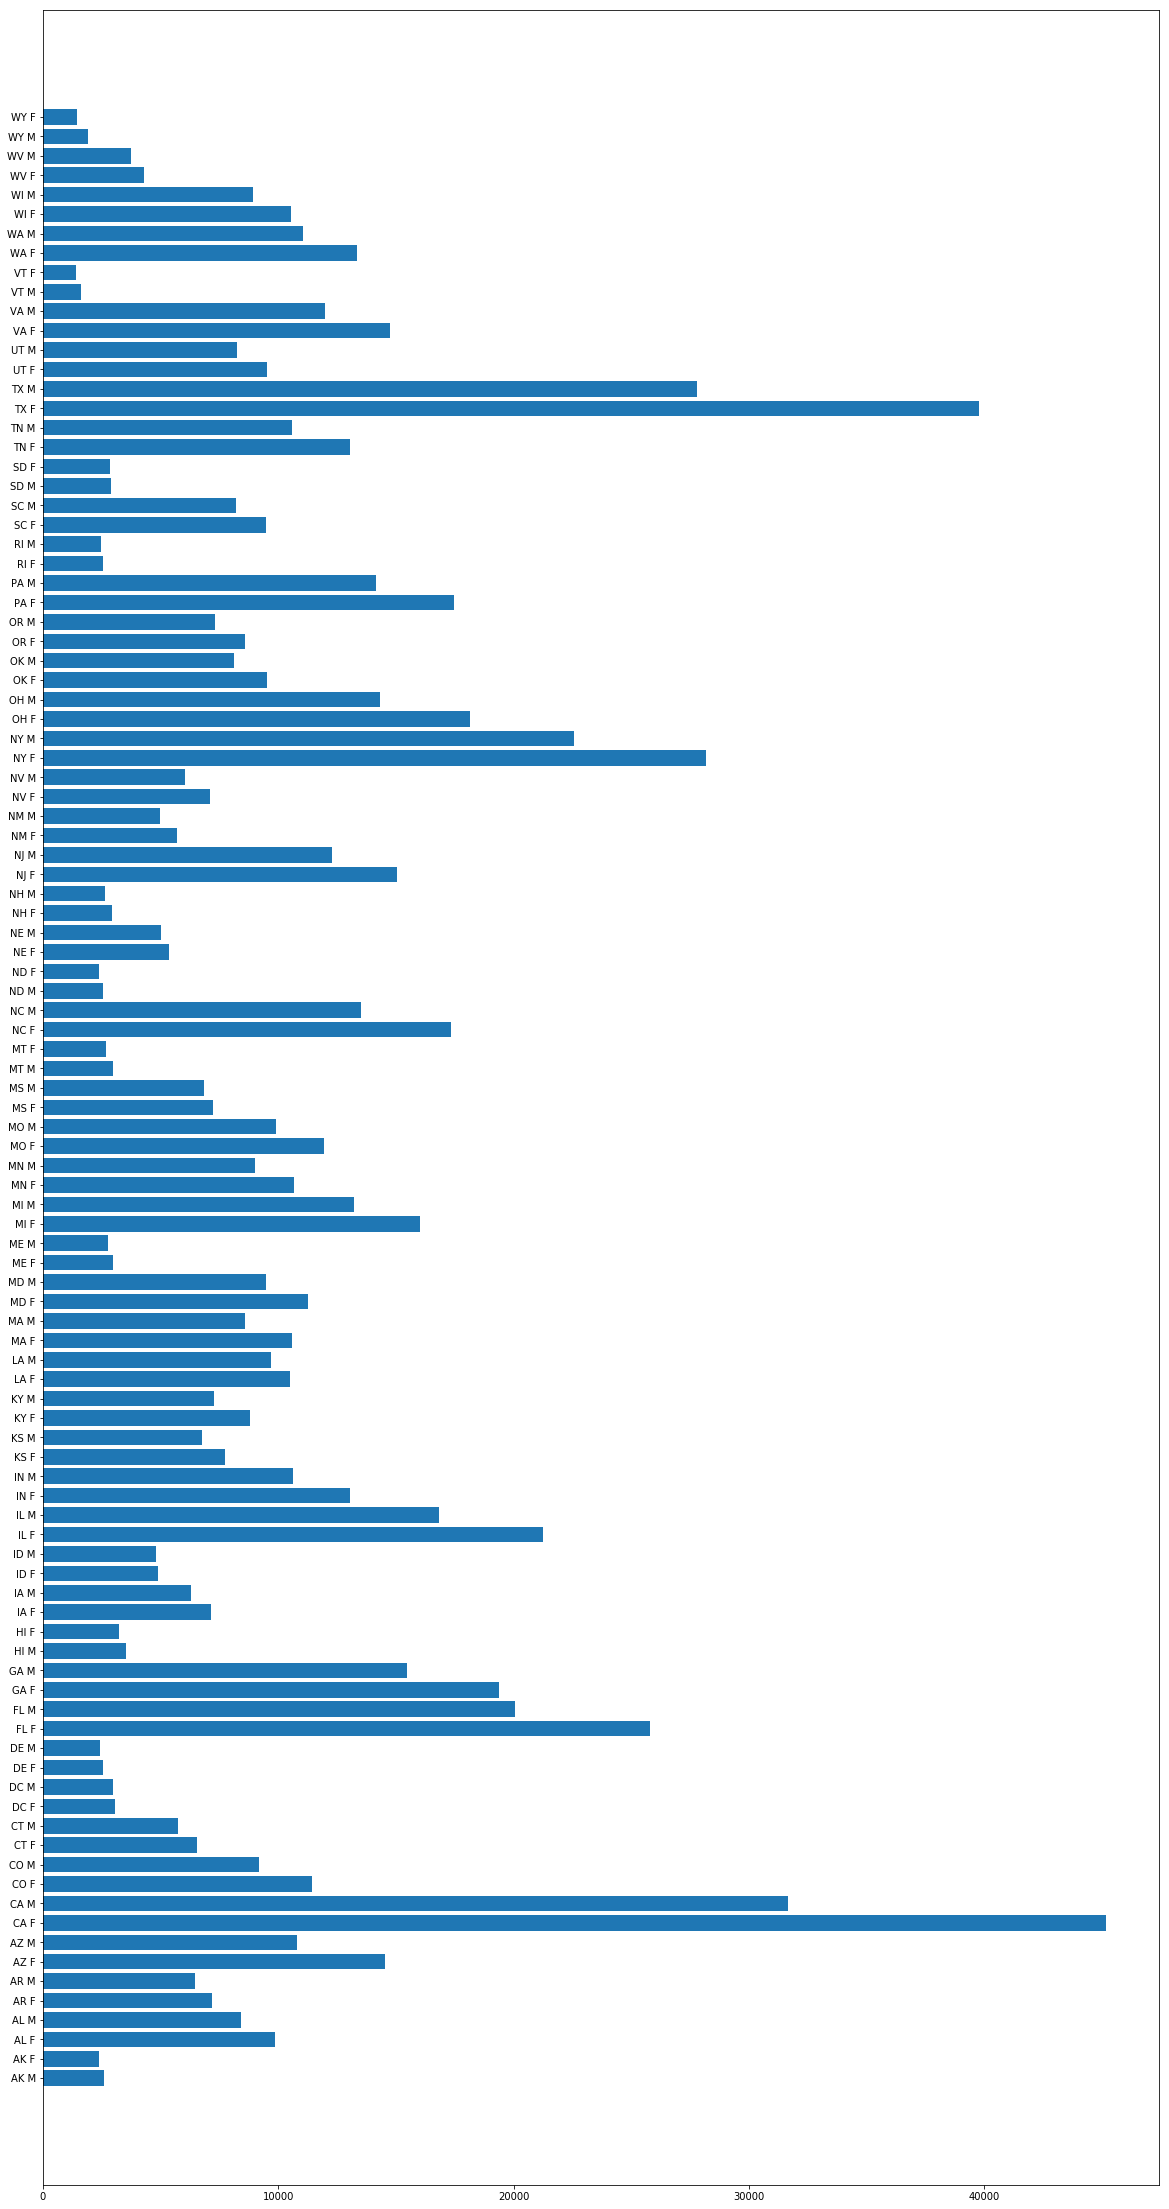

In [155]:
#5. Distribution of male and female born count by states Histogram
ax ,fig = plt.subplots(ncols=1,nrows=1,figsize= (20,40))
plt.barh(l,t.get_values(),)
plt.show()

Task 2:
We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

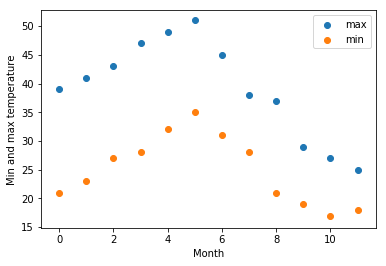

In [156]:
import numpy as np
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])


#temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
#temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.scatter(months, temp_max,label='max')
plt.scatter(months, temp_min, label='min')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.legend()
plt.show()

In [157]:
from scipy.optimize import curve_fit


def temp_op(x,a,b,c,d):
    return a+ b *np.sin((x*c +d)*np.pi/180 )

res_max, cov_max = curve_fit(temp_op, months,temp_max,method='lm')
res_min, cov_min = curve_fit(temp_op, months,temp_min,method='lm')

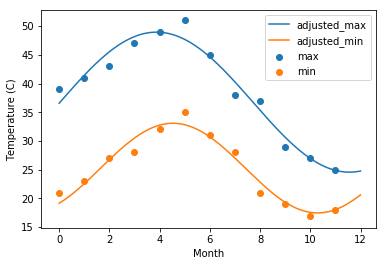

In [158]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.scatter(months, temp_max, label='max')
plt.plot(days, temp_op(days, *res_max), label='adjusted_max')
plt.scatter(months, temp_min, label='min')
plt.plot(days, temp_op(days, *res_min), label='adjusted_min')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()
